In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def fibonacci(n):
    a, b = 0, 1
    fib_sequence = []
    for _ in range(n):
        fib_sequence.append(a)
        a, b = b, a + b
    return fib_sequence

def decode_fibonacci(sol, n=10):
    phi = sol[0]
    theta = sol[1]
    decoded = [(np.pow(phi, i) + np.pow(theta, i)) / np.sqrt(5) for i in range(n)]
    return np.array(decoded)

def fitness(sol):
    decoded = decode_fibonacci(sol, n=10)
    fibseq = fibonacci(10)
    return np.sum(np.square(np.subtract(fibseq, decoded)))

In [3]:
ngen = 128
popsize = 128

In [4]:
def run_es(ngen, popsize, ndim=2, learning_rate=0.01, noise_factor=0.1, bounds=(0, 1), random_state=None):
    rng = np.random.default_rng(random_state)
    guess = rng.integers(low=bounds[0], high=bounds[1], size=ndim)
    guesses = []
    for i in range(ngen):
        N = rng.normal(size=(popsize, ndim))  # sample from normal distribution
        F = np.zeros(popsize)
        for j in range(popsize):
            w = guess + noise_factor * N[j]
            F[j] = fitness(w)
        # standardize fitnesses to have guassian (normal) distribution
        A = (F - np.mean(F)) / np.std(F)
        guess = guess - learning_rate / (popsize * noise_factor) * np.dot(np.transpose(N), A)
        guesses.append(guess)
        if i % (ngen // 10) == 0:
            print(f"gen:{i}, fitness:{fitness(guess):.3f}")
    return np.array(guesses)

In [5]:
runs = dict()
for seed in range(30):
    guesses = run_es(ngen=ngen, popsize=popsize, bounds=(-5, 5), learning_rate=1e-4, noise_factor=1e-2, random_state=seed)
    runs[seed] = guesses

gen:0, fitness:81302719.290
gen:12, fitness:39609551.070
gen:24, fitness:18751333.134
gen:36, fitness:8512924.661
gen:48, fitness:3697623.974
gen:60, fitness:1535846.568
gen:72, fitness:606254.328
gen:84, fitness:222326.653
gen:96, fitness:73636.645
gen:108, fitness:21707.033
gen:120, fitness:4372.903
gen:0, fitness:1890.586
gen:12, fitness:1877.238
gen:24, fitness:1872.892
gen:36, fitness:1871.628
gen:48, fitness:1871.228
gen:60, fitness:1871.005
gen:72, fitness:1870.794
gen:84, fitness:1870.485
gen:96, fitness:1869.898
gen:108, fitness:1868.422
gen:120, fitness:1864.422
gen:0, fitness:33293145.273
gen:12, fitness:21013368.027
gen:24, fitness:13174184.060
gen:36, fitness:8039799.232
gen:48, fitness:4962297.239
gen:60, fitness:2965231.588
gen:72, fitness:1754514.512
gen:84, fitness:1019795.816
gen:96, fitness:571623.175
gen:108, fitness:317192.322
gen:120, fitness:169080.979
gen:0, fitness:752087824671.796
gen:12, fitness:483691070381.753
gen:24, fitness:308959045883.460
gen:36, fitnes

In [6]:
dfs = []
for seed, guesses in runs.items():
  df = pd.DataFrame([dict(seed=seed, gen=gen, fitness=fitness(guess)) for gen, guess in enumerate(guesses)])
  dfs.append(df)
df = pd.concat(dfs, ignore_index=True)
df

,seed,gen,fitness
0,0,0,8.130272e+07
1,0,1,7.669330e+07
2,0,2,7.239830e+07
3,0,3,6.879219e+07
4,0,4,6.444368e+07
...,...,...,...
3835,29,123,2.534710e+09
3836,29,124,2.461708e+09
3837,29,125,2.386985e+09
3838,29,126,2.318414e+09


In [7]:
df.loc[df['gen']==ngen-1, 'fitness'].describe()

count    3.000000e+01
mean     4.986062e+08
std      1.270024e+09
min      1.281345e+01
25%      1.497768e+03
50%      1.248445e+04
75%      1.658761e+07
max      4.382260e+09
Name: fitness, dtype: float64

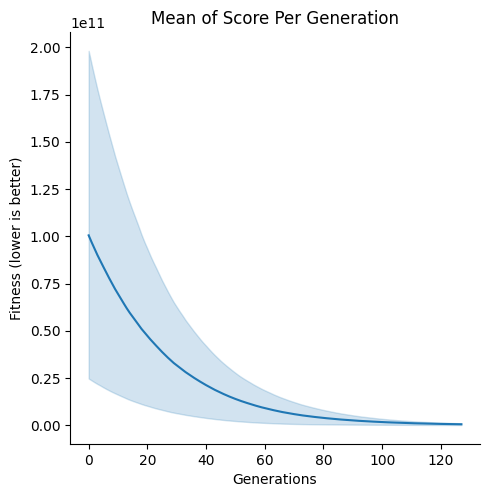

In [24]:
g = sns.relplot(data=df, x='gen', y='fitness', kind='line', errorbar='ci', estimator='mean', seed=0)
# g.set(yscale='log')
plt.title("Mean of Score Per Generation")
plt.xlabel("Generations")
plt.ylabel("Fitness (lower is better)")
plt.show()

In [22]:
with np.printoptions(suppress=True) as opts:
    best_run = min(runs.values(), key=lambda guesses: fitness(guesses[-1]))
    print(f"Best run, final guess: {best_run[-1]}, fitness: {fitness(best_run[-1]):.3f}")
    for i, (y_true, y_pred) in enumerate(zip(fibonacci(20), decode_fibonacci(best_run[-1], n=20))):
        if i < 10:
            print(f"{i:>2}: {y_true:>4} | {y_pred:.2f}")
        else:
            print(f"\x1b[31m{i:>2}: {y_true:>4} | {y_pred:.2f}\x1b[0m")

Best run, final guess: [ 1.62078652 -1.17029807], fitness: 12.813
 0:    0 | 0.89
 1:    1 | 0.20
 2:    1 | 1.79
 3:    2 | 1.19
 4:    3 | 3.93
 5:    5 | 4.02
 6:    8 | 9.26
 7:   13 | 11.80
 8:   21 | 22.87
 9:   34 | 32.68
10:   55 | 58.10
11:   89 | 88.16
12:  144 | 149.92
13:  233 | 234.75
14:  377 | 390.12
15:  610 | 621.02
16:  987 | 1019.75
17: 1597 | 1637.34
18: 2584 | 2671.86
19: 4181 | 4309.35
